In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import random
import seaborn as sns
sns.set()

In [2]:
# Lectura de los datos
loc=r"winequality-red.csv"
data= pd.read_csv(loc,sep=";",)
names=list(data.columns.values)
label=list(data["quality"])
xlist=(data.drop("quality",1))
xlist=[xlist.iloc[i] for i in range(len(xlist))]

Valor mínimo de mse: 0.3886


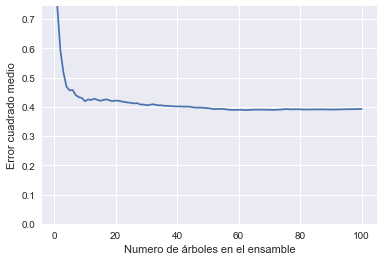

In [3]:
nrows = len(xlist)
ncols = len(xlist[0])

# Tomando un conjunto fijo de prueba del 30%
np.random.seed(1)
nSample = int(nrows*0.3)
idxTest = random.sample(range(nrows),nSample)
idxTest.sort()
idxTrain = [idx for idx in range(nrows) if not (idx in idxTest)]

xTrain = [xlist[r] for r in idxTrain]
xTest = [xlist[r] for r in idxTest]
yTrain = [label[r] for r in idxTrain]
yTest = [label[r] for r in idxTest]


# Entrenamiento de múltiples modelos
numTreeMax = 100
treeDepth = 12

modelList = []
predList = []
nBagSamples = int (len(xTrain)*0.5)

for iTrees in range(numTreeMax):
    idxBag = []
    for i in range(nBagSamples):
        idxBag.append(random.choice(range(len(xTrain))))
    xTrainBag = [xTrain[i] for i in idxBag]
    yTrainBag = [yTrain[i] for i in idxBag]
    
    modelList.append(DecisionTreeRegressor(max_depth=treeDepth))
    modelList[-1].fit(xTrainBag,yTrainBag)
    
    # Realizar las predicciones con el último modelo
    latestPrediction = modelList[-1].predict(xTest)
    predList.append(list(latestPrediction))
    
# Construir la predicción acumulada para los primeros n modelos

mse = []
allPredictions = []
for iModels in range(len(modelList)):
    # Promediar los primeros i modelos
    prediction = []
    for iPred in range(len(xTest)):
        prediction.append(sum([predList[i][iPred] for i in range(iModels + 1)])/(iModels + 1))
    
    allPredictions.append(prediction)
    errors = [(yTest[i] - prediction[i]) for i in range(len(yTest))]
    mse.append(sum([e * e for e in errors])/len(yTest))
    
nModels = [i+1 for i in range(len(modelList))]
plt.plot(nModels,mse)
plt.axis("tight")
plt.xlabel("Numero de árboles en el ensamble")
plt.ylabel("Error cuadrado medio")
plt.ylim((0.0,max(mse)));

print("Valor mínimo de mse: %.4f" % min(mse))